<center><b><span style=font-size:30px><font color='MediumBlue'><u>EDA on Cars Prices Dataset</u></b></center>

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [140]:
df = pd.read_csv('cars.csv')

In [141]:
# First 5 Records

df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


<b><span style=font-size:20px><font color='MediumBlue'><u>Exploratory data analysis (EDA) Steps</u></font></span></b>
<span style=font-size:15px><br><b>1.</b> Check Null values<br><b>2.</b> Handle Outliers<br><b>3.</b> Handling Categorical Data<br><b>4.</b> Handling skewness on contienous numerical value<br><b>5.</b> Feature Engineering<br><b>6.</b> Scaling</span>

<b><span style=font-size:20px><font color='MediumBlue'><u>Step 1: Check Null Values</u></font></span></b>
<span style=font-size:15px><br><b>1.</b> Check Non Numeric column in the dataset<br><b>2.</b> Convert the Non Numeric value to NAN <b>(np.replace)</b><br><b>3.</b> Convert NAN to float value <b>(.astype)</b><br><b>4.</b> Check the NULL VALUE Percentage, It should be less than 50% to make necessary changes<br><b>5.</b> Find the mean of the column <b>(.mean)</b><br><b>6.</b> Fill the NAN value with the mean value <b>(.fillna)</b>

In [142]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

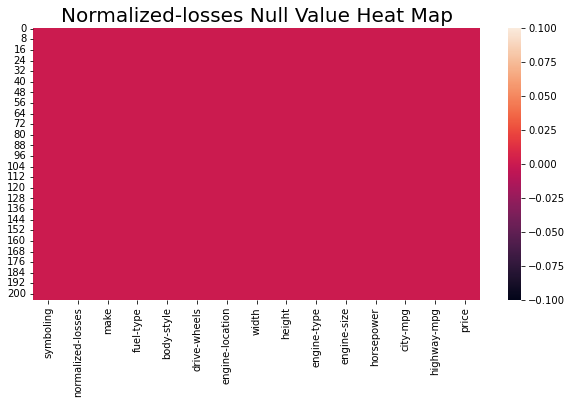

In [143]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.title('Normalized-losses Null Value Heat Map',fontsize=20,color='Black')
plt.show()

In [144]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [145]:
df.tail()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470
204,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,19,25,22625


In [146]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [147]:
# Rows: 205  $  Columns: 15

df.shape

(205, 15)

<b><span style=font-size:20px><font color='OrangeRed'>Step 1: Check Non Numeric column in the dataset</font></span></b>

<b>-</b> Here It Shows There <b>41 Special Characters.</b>

In [1]:
c = 0
for i,data in enumerate(df['normalized-losses']):
    if not data.isnumeric():
        c = c + 1
        print(i," ",data)
print('No. of Special Character: ',c)

NameError: name 'df' is not defined

<b><span style=font-size:20px><font color='OrangeRed'>Step 2: Convert the Non Numeric value to NAN (.replace)</font></span></b>

<b>-</b> Converting all <b>?</b> into <b>NAN</b> i.e. np.nan.</b>

In [149]:
# Replacing '?' in normalized-losses Column with null values permanently

df['normalized-losses'].replace('?',np.nan,inplace=True)

In [150]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

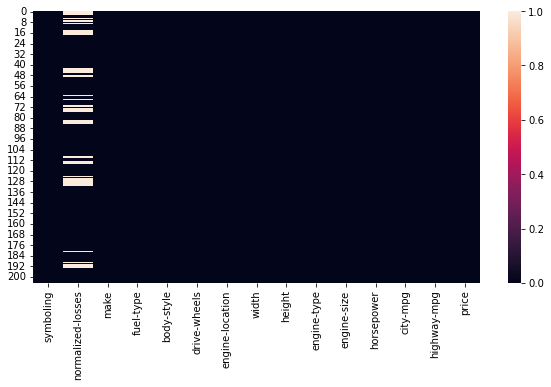

In [151]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

In [152]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

<b><span style=font-size:20px><font color='OrangeRed'>Step 3: Convert NAN to float value (.astype)</font></span></b>

<b>-</b> Converting <b>nomalized-losses</b> into <b>float data type.</b>

In [153]:
# Changing 'normalizes-losses' column from 'object' to 'float64'

df['normalized-losses'] = df['normalized-losses'].astype('float')

In [154]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

<b><span style=font-size:20px><font color='OrangeRed'>Step 4: Check the NULL VALUE Percentage</font></span></b>

<b>- Null Value Percentage</b> should be <b> < 50% </b><br>
<b>-</b> If <b>yes</b> Then only perform <b>Step-5</b>

In [155]:
# check % of null values for normalized-losses column

df['normalized-losses'].isnull().sum()*100/df.shape[0]

20.0

<b><span style=font-size:20px><font color='OrangeRed'>Step 5: Find the mean of the column (.mean)</font></span></b>

In [156]:
# Filling null values with average/mean of normalized-losses column

m = df['normalized-losses'].mean()
m

122.0

<b><span style=font-size:20px><font color='OrangeRed'>Step 6: Fill the NAN value with the mean value (.fillna)</font></span></b>

<b>- Filling Null Values</b>  with the <b>mean of nomalized-losses column.</b>

In [157]:
df['normalized-losses'].fillna(m,inplace=True)

In [158]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

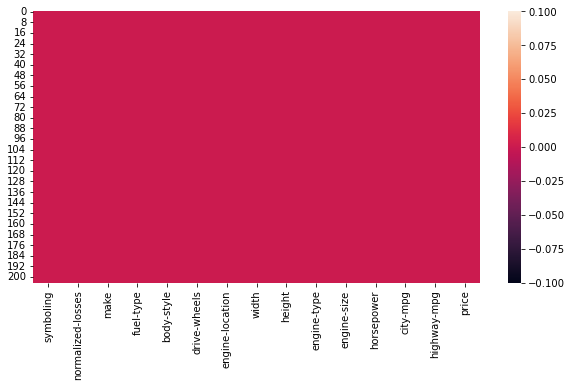

In [159]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

In [160]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

<span style=font-size:15px><font color='OrangeRed'>- Since <b>'horsepower'</b> column is also <b>'object'</b> type we will <b>perform same operation as 'normalized-losses' as above</b></font></span>

<b><span style=font-size:20px><font color='OrangeRed'>Step 1: Check Non Numeric column in the dataset</font></span></b>

<b>-</b> Here It Shows There <b>2 Special Characters.</b>

In [161]:
c = 0
for i,data in enumerate(df['horsepower']):
    if not data.isnumeric():
        c = c + 1
        print(i," ",data)
print("No. of Special Character: ",c)
        

130   ?
131   ?
No. of Special Character:  2


<b><span style=font-size:20px><font color='OrangeRed'>Step 2: Convert the Non Numeric value to NAN (.replace)</font></span></b>

<b>-</b> Converting all <b>?</b> into <b>NAN</b> i.e. np.nan.</b>

In [162]:
# Replacing '?' in horsepower column with null values permanently

df['horsepower'].replace('?',np.nan,inplace=True)

In [163]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<b><span style=font-size:20px><font color='OrangeRed'>Step 3: Convert NAN to float value (.astype)</font></span></b>

<b>-</b> Converting <b>horsepower</b> into <b>float data type.</b>

In [164]:
# Changing 'horsepower' column from 'object' to 'float64'

df['horsepower'] = df['horsepower'].astype('float')

<b><span style=font-size:20px><font color='OrangeRed'>Step 4: Check the NULL VALUE Percentage, It should be less than 50% to make necessary changes</font></span></b>

<b>- Null Value Percentage</b> should be <b> < 50% </b><br>
<b>-</b> If <b>yes</b> Then only perform <b>Step-5</b>

In [165]:
# check % of null values for horsepower column
# It should be less than 50% to make necessary changes

df['horsepower'].isnull().sum()*100/df.shape[0]

0.975609756097561

<b><span style=font-size:20px><font color='OrangeRed'>Step 5: Find the mean of the column (.mean)</font></span></b>

In [166]:
m = df['horsepower'].mean()
m

104.25615763546799

<b><span style=font-size:20px><font color='OrangeRed'>Step 6: Fill the NAN value with the mean value (.fillna)</font></span></b>

<b>- Filling Null Values</b>  with the <b>mean of horsepower column.</b>

In [167]:
df['horsepower'].fillna(m,inplace=True)

In [168]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

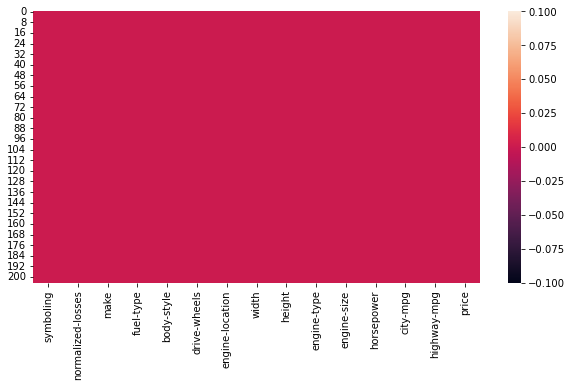

In [169]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

In [170]:
df.tail()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470
204,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,19,25,22625


<b><span style=font-size:20px><font color='MediumBlue'><u>Step 2: Check Outliers</u></font></span></b>

<span style=font-size:15px><b>1.</b> Plot a BoxPlot and Identify the outlier <br><b>2.</b> filter the Outlier based on the condition <br><b>3.</b> Delete the Particular row from the condition that we gave from Step-3 <b>df.drop(row_number,inplace=True)</b>

<b><span style=font-size:20px><font color='OrangeRed'>Step 1: Plot a BoxPlot and Identify the outlier</font></span></b>

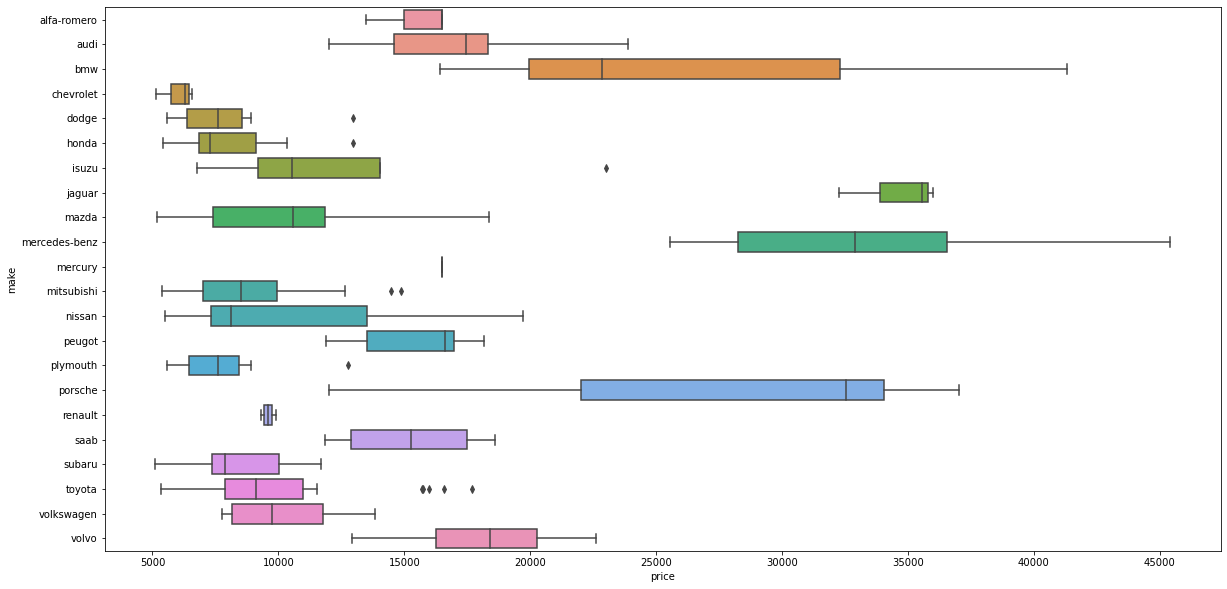

In [171]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='price',y='make')
plt.show()

<b><span style=font-size:20px><font color='OrangeRed'>Step 2: filter the Outlier based on the condition</font></span></b>

In [172]:
df[(df['make']=='toyota') & (df['price']>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


<b><span style=font-size:20px><font color='OrangeRed'>Step 3: Delete the Particular row from the condition that we gave from Step-2 ( df.drop() )</font></span></b>

In [173]:
df.drop([172,178,179,180,181],inplace=True)

In [174]:
df[(df['make']=='plymouth') & (df['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [175]:
df.drop(124,inplace=True)

In [176]:
df[(df['make']=='mitsubishi') & (df['price']>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [177]:
df.drop([83,84],inplace=True)

In [178]:
df[(df['make']=='isuzu') & (df['price']>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [179]:
df.drop(45,inplace=True)

In [180]:
df[(df['make']=='honda') & (df['price']>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [181]:
df.drop(41,inplace=True)

In [182]:
df[(df['make']=='dodge') & (df['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [183]:
df.drop(29,inplace=True)

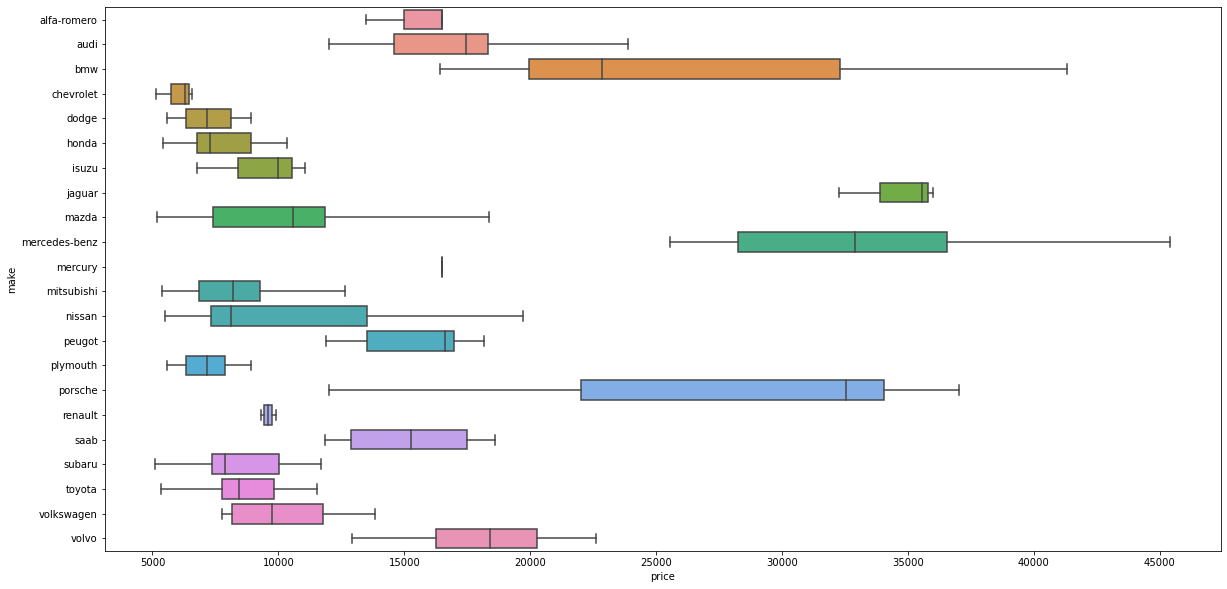

In [184]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='price',y='make')
plt.show()

<b><span style=font-size:20px><font color='MediumBlue'><u>Step 3: Handling Categorical Data</u></font></span></b>

<span style=font-size:15px><b>1.</b> Separate Categorical data and Numerical Data <br><b>2.</b> Convert all Categorical data into Numerical data

In [185]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

<b><span style=font-size:20px><font color='OrangeRed'>Step 1: Separate Categorical data and Numerical Data</font></span></b>

In [186]:
df_cat = df.select_dtypes('object')
df_cat.dtypes

make               object
fuel-type          object
body-style         object
drive-wheels       object
engine-location    object
engine-type        object
dtype: object

In [187]:
df_num = df.select_dtypes(['int64','float64'])
df_num.dtypes

symboling              int64
normalized-losses    float64
width                float64
height               float64
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

<b><span style=font-size:20px><font color='OrangeRed'>Step 2: Convert all Categorical data into Numerical data</font></span></b>

In [188]:
from sklearn.preprocessing import LabelEncoder

for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [189]:
df_cat.dtypes

make               int32
fuel-type          int32
body-style         int32
drive-wheels       int32
engine-location    int32
engine-type        int32
dtype: object

<b><span style=font-size:20px><font color='MediumBlue'><u>Step 4: Handling skewness on contienous numerical value</u></font></span></b>

<span style=font-size:15px><b>1.</b> Check the Skewness of each and every column<br><b>2.</b> Correlation check: Plot Heatmap to check individual values <b>(annot=True)</b><br><b>3.</b> Check Individual Column Value if -ve value comes in any column then do not perform Skewness on that column 
<br><b>4.</b> Merge Numerical and Categorical Data

In [190]:
# check skewness on df_num dataframe
df_num.dtypes

symboling              int64
normalized-losses    float64
width                float64
height               float64
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

<b><span style=font-size:20px><font color='OrangeRed'>Step 1: Check the Skewness of each and every column</font></span></b>

Skewness of symboling is 0.21553879118985067


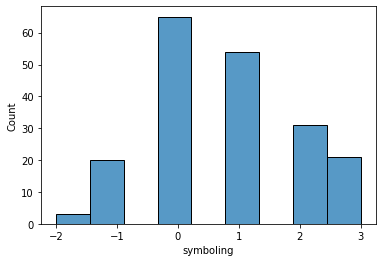

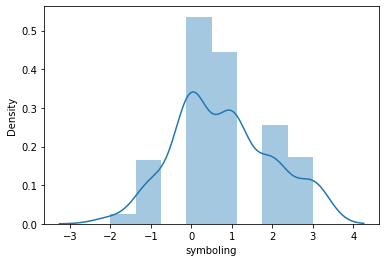

Skewness of normalized-losses is 0.8548297087772652


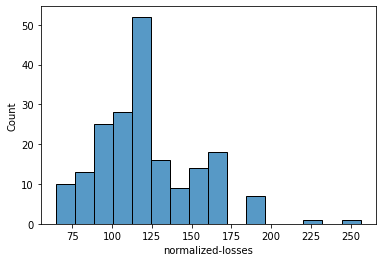

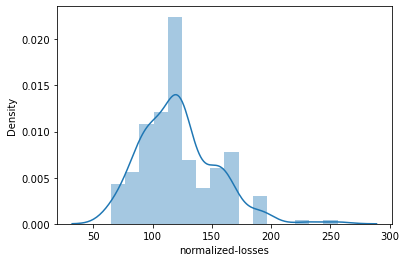

Skewness of width is 0.9211778944564376


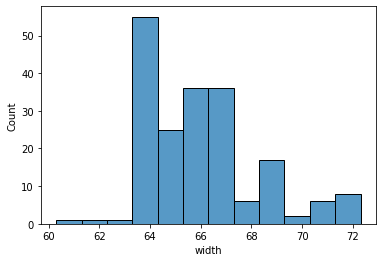

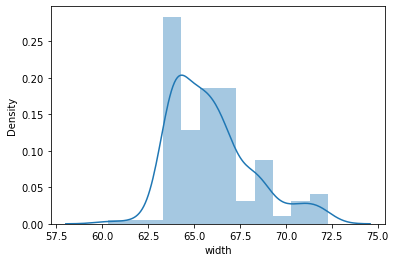

Skewness of height is 0.013948040584818078


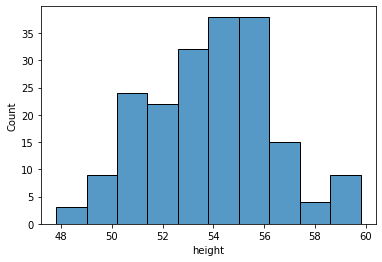

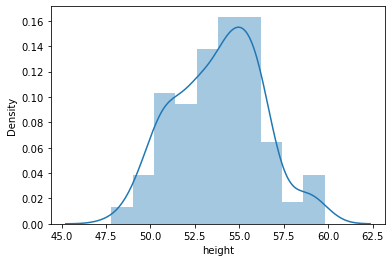

Skewness of engine-size is 2.0701667089337397


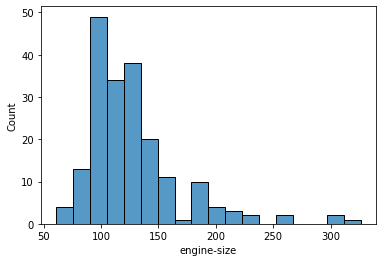

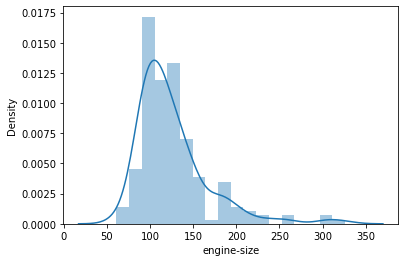

Skewness of horsepower is 1.567805996273028


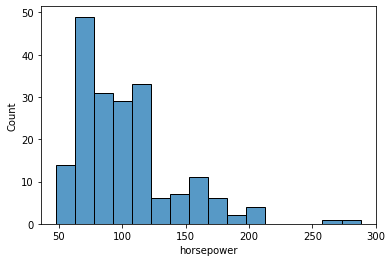

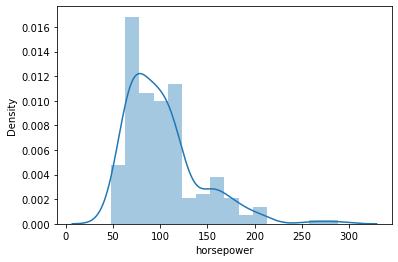

Skewness of city-mpg is 0.6045920607537428


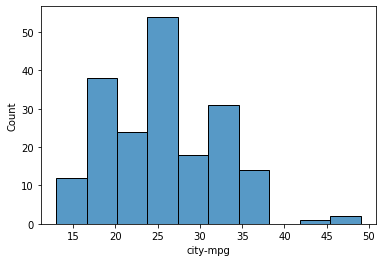

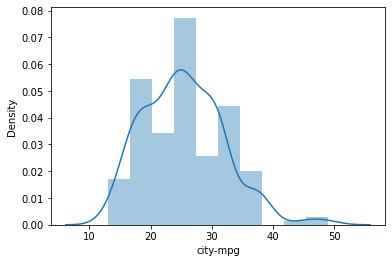

Skewness of highway-mpg is 0.47974839979280953


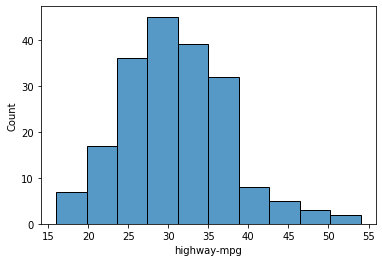

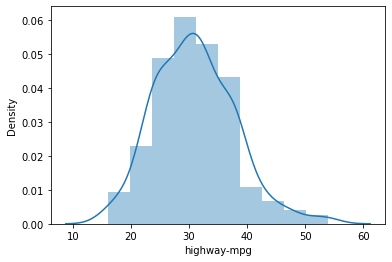

Skewness of price is 1.8308661663282721


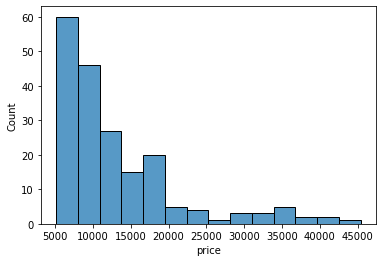

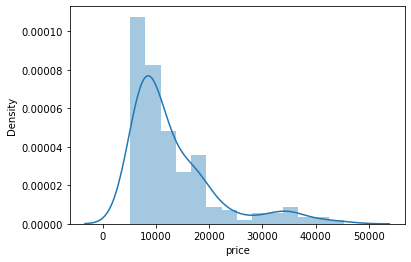

In [191]:
for col in df_num:
    print('Skewness of',col,'is',df_num[col].skew())
    sns.histplot(df[col])
    plt.show()
    sns.distplot(df[col])
    plt.show()

<b><span style=font-size:20px><font color='OrangeRed'>Step 2: Correlation check: Plot Heatmap to check individual values (annot=True)</font></span></b>

<b>1.</b> Coorelation: Each Input with Output (Target Variable).<br>
<b>2.</b> Value of Correlation between -1 to +1.<br>
<b>3.</b> Good Correlation Range >=0.5 or -0.5.<br>
<b>4.</b> Use Inbuilt Method corr().

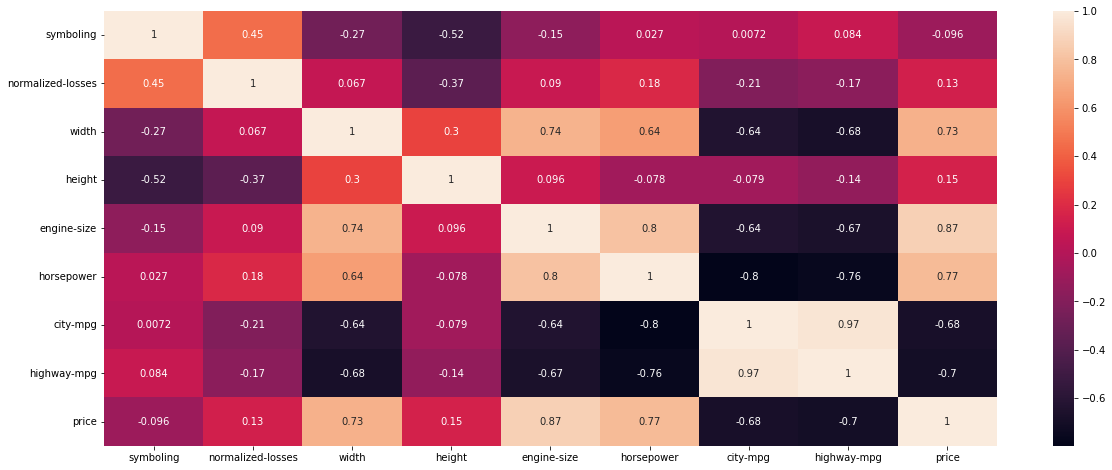

In [192]:
plt.figure(figsize=(20,8))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

<b><span style=font-size:20px><font color='OrangeRed'>Step 3: Check Individual Column Value if -ve value comes in any column then do not perform Skewness on that column</font></span></b>

In [193]:
column = ['symboling','normalized-losses']
for col in column:
    print(col)
    print(df_num[col].unique())

symboling
[ 3  1  2  0 -1 -2]
normalized-losses
[122. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 137. 101.  78.
 106.  85. 107. 145. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.
  77.  91. 134.  65.  94. 256.  95.]


In [194]:
df_num['normalized-losses'] = np.log(df_num['normalized-losses'])

In [195]:
df_num['normalized-losses'].skew()

0.018613125599377153

<b><span style=font-size:20px><font color='OrangeRed'>Step 4: Merge Numerical and Categorical Data</font></span></b>

In [196]:
# To join both dataframe df_cat and df_num in one dataframe df_new

df_new = pd.concat([df_cat,df_num],axis=1)
df_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,4.804021,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,4.804021,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,4.804021,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,5.099866,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,5.099866,66.4,54.3,136,115.0,18,22,17450


<b><span style=font-size:20px><font color='MediumBlue'><u>Step 5: Feature Engineering</u></font></span></b>

<b>1. </b> Means to add new features in existing dataset if required (optional)

In [197]:
df_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,4.804021,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,4.804021,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,4.804021,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,5.099866,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,5.099866,66.4,54.3,136,115.0,18,22,17450


<b>- </b> <b>Multiplying width</b> and <b>height</b> column and creating <b>new column Area</b>.

In [198]:
df_new['Area'] = df_new['width'] * df_new['height']
df_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,Area
0,0,1,0,2,0,0,3,4.804021,64.1,48.8,130,111.0,21,27,13495,3128.08
1,0,1,0,2,0,0,3,4.804021,64.1,48.8,130,111.0,21,27,16500,3128.08
2,0,1,2,2,0,5,1,4.804021,65.5,52.4,152,154.0,19,26,16500,3432.20
3,1,1,3,1,0,3,2,5.099866,66.2,54.3,109,102.0,24,30,13950,3594.66
4,1,1,3,0,0,3,2,5.099866,66.4,54.3,136,115.0,18,22,17450,3605.52


In [199]:
df_new.drop(['width','height'],axis=1,inplace=True)

In [200]:
df_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,engine-size,horsepower,city-mpg,highway-mpg,price,Area
0,0,1,0,2,0,0,3,4.804021,130,111.0,21,27,13495,3128.08
1,0,1,0,2,0,0,3,4.804021,130,111.0,21,27,16500,3128.08
2,0,1,2,2,0,5,1,4.804021,152,154.0,19,26,16500,3432.20
3,1,1,3,1,0,3,2,5.099866,109,102.0,24,30,13950,3594.66
4,1,1,3,0,0,3,2,5.099866,136,115.0,18,22,17450,3605.52


<b><span style=font-size:20px><font color='MediumBlue'><u>Step 6: Scaling</u></font></span></b><br>

In [201]:
df_new.columns

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type', 'symboling', 'normalized-losses', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price', 'Area'],
      dtype='object')

In [202]:
X = df_new.drop('price',axis=1)
X.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,engine-size,horsepower,city-mpg,highway-mpg,Area
0,0,1,0,2,0,0,3,4.804021,130,111.0,21,27,3128.08
1,0,1,0,2,0,0,3,4.804021,130,111.0,21,27,3128.08
2,0,1,2,2,0,5,1,4.804021,152,154.0,19,26,3432.20
3,1,1,3,1,0,3,2,5.099866,109,102.0,24,30,3594.66
4,1,1,3,0,0,3,2,5.099866,136,115.0,18,22,3605.52


In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
ss = StandardScaler()

In [205]:
X = ss.fit_transform(X)
print(X)

[[-1.93400671  0.33903175 -3.11163379 ... -0.67576177 -0.58047414
  -1.85157709]
 [-1.93400671  0.33903175 -3.11163379 ... -0.67576177 -0.58047414
  -1.85157709]
 [-1.93400671  0.33903175 -0.74898426 ... -0.982065   -0.72615588
  -0.51074029]
 ...
 [ 1.413123    0.33903175  0.43234051 ... -1.13521662 -1.16320109
   1.21644904]
 [ 1.413123   -2.94957624  0.43234051 ...  0.08999631 -0.58047414
   1.21644904]
 [ 1.413123    0.33903175  0.43234051 ... -0.982065   -0.87183761
   1.21644904]]
